In [57]:
#import libraries in one section for convinience

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:

dataset=pd.read_csv(r'C:\Users\allur\Downloads\archive (1).zip')
print(dataset)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [41]:
#considering only few attributes and target variable as mentioned in task1
subset=dataset.iloc[:,[5,7, 8, 9,-1]]
subset

,RM,DIS,RAD,TAX,MEDV
0,6.575,4.0900,1,296,24.0
1,6.421,4.9671,2,242,21.6
2,7.185,4.9671,2,242,34.7
3,6.998,6.0622,3,222,33.4
4,7.147,6.0622,3,222,36.2
...,...,...,...,...,...
501,6.593,2.4786,1,273,22.4
502,6.120,2.2875,1,273,20.6
503,6.976,2.1675,1,273,23.9
504,6.794,2.3889,1,273,22.0


In [42]:
#checking for null values
print(subset.isnull().sum())


RM      0
DIS     0
RAD     0
TAX     0
MEDV    0
dtype: int64


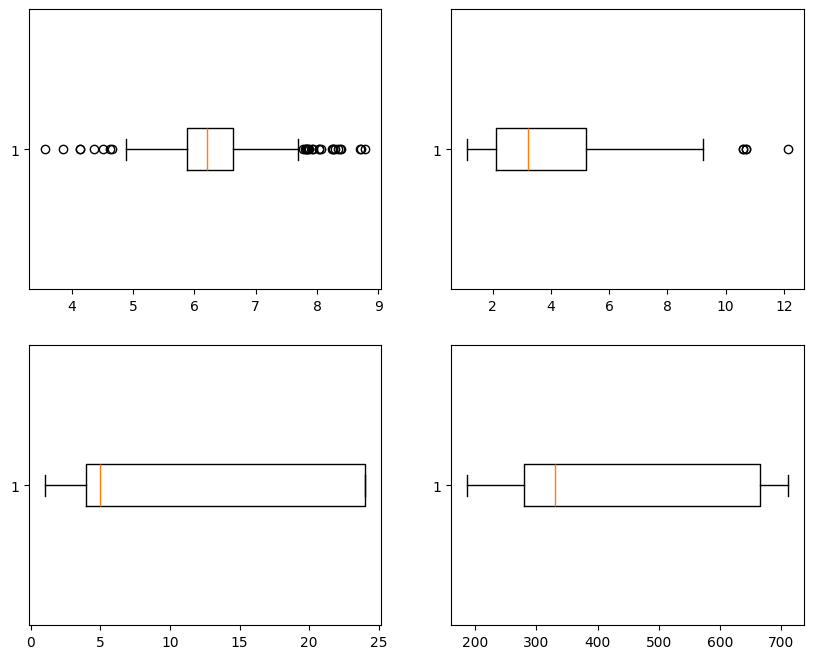

In [43]:
#using box plot to detect outliers
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].boxplot(subset['RM'],vert=False)
axs[0, 1].boxplot(subset['DIS'],vert=False)
axs[1, 0].boxplot(subset['RAD'],vert=False)
axs[1, 1].boxplot(subset['TAX'],vert=False)
plt.show()

In [44]:
#handling outliers
#z score method
upper_limit=subset['RM'].mean()+3*subset['RM'].std()
lower_limit=subset['RM'].mean()-3*subset['RM'].std()
print(upper_limit)
print(lower_limit)


8.392485817597748
4.176782957105809


In [45]:
#printing outliers data for code logic checking
len(subset.loc[(subset['RM']<lower_limit) | (subset['RM']>upper_limit)])
subset.loc[(subset['RM']<lower_limit) | (subset['RM']>upper_limit)]


,RM,DIS,RAD,TAX,MEDV
225,8.725,2.8944,8,307,50.0
257,8.704,1.8010,5,264,50.0
262,8.398,2.2885,5,264,48.8
364,8.780,1.9047,24,666,21.9
365,3.561,1.6132,24,666,27.5
367,3.863,1.5106,24,666,23.1
374,4.138,1.1370,24,666,13.8
406,4.138,1.1781,24,666,11.9


In [46]:
new_data=subset.loc[(subset['RM']>=lower_limit) & (subset['RM']<=upper_limit)]
len(new_data)#498
len(subset)#506

506

In [47]:
#handling outliers in other attribute (DIS)
upper_limit=new_data['DIS'].mean()+3*new_data['DIS'].std()
lower_limit=new_data['DIS'].mean()-3*new_data['DIS'].std()
print(upper_limit)
print(lower_limit)
new_data1=new_data.loc[(new_data['DIS']>=lower_limit) & (new_data['DIS']<=upper_limit)]
len(new_data1)


10.144987867367387
-2.4905135701786305


493

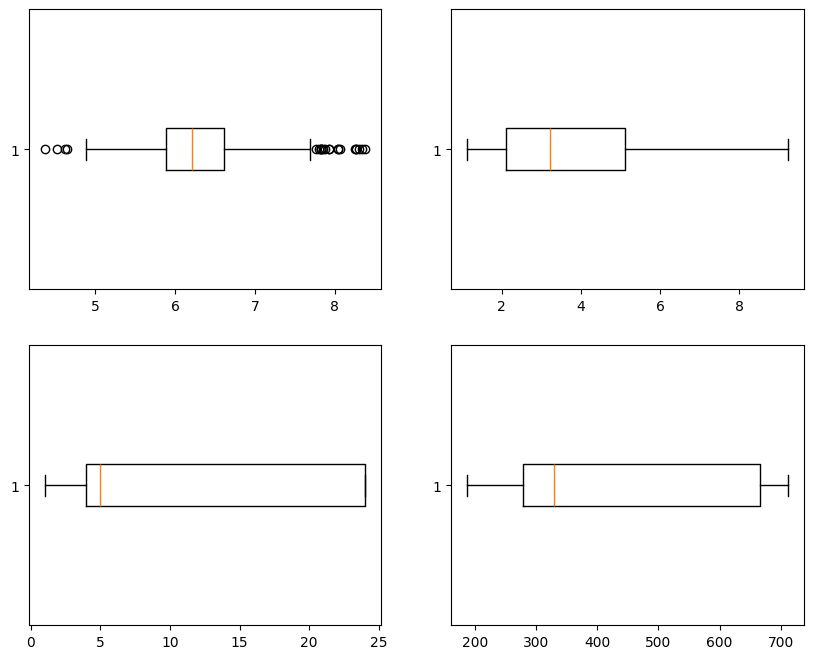

In [48]:
#plotting after hanling outliers upto some extent
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].boxplot(new_data1['RM'],vert=False)
axs[0, 1].boxplot(new_data1['DIS'],vert=False)
axs[1, 0].boxplot(new_data1['RAD'],vert=False)
axs[1, 1].boxplot(new_data1['TAX'],vert=False)
plt.show()

In [49]:
#scaling for fast computation

scaler = StandardScaler()
new_data1_scaled = scaler.fit_transform(new_data1)
print(new_data1_scaled)
df=DataFrame(new_data1_scaled)
df


[[ 0.45020633  0.16855864 -0.97800478 -0.66196859  0.17723954]
 [ 0.2104218   0.60996218 -0.86265637 -0.98356661 -0.08855238]
 [ 1.40000217  0.60996218 -0.86265637 -0.98356661  1.36222851]
 ...
 [ 1.07458032 -0.79894597 -0.97800478 -0.79894552  0.16616488]
 [ 0.79119861 -0.68752567 -0.97800478 -0.79894552 -0.04425373]
 [-0.39838177 -0.62909796 -0.97800478 -0.79894552 -1.16279471]]


,0,1,2,3,4
0,0.450206,0.168559,-0.978005,-0.661969,0.177240
1,0.210422,0.609962,-0.862656,-0.983567,-0.088552
2,1.400002,0.609962,-0.862656,-0.983567,1.362229
3,1.108835,1.161075,-0.747308,-1.102677,1.218258
4,1.340835,1.161075,-0.747308,-1.102677,1.528348
...,...,...,...,...,...
488,0.478233,-0.642384,-0.978005,-0.798946,0.000045
489,-0.258248,-0.738556,-0.978005,-0.798946,-0.199299
490,1.074580,-0.798946,-0.978005,-0.798946,0.166165
491,0.791199,-0.687526,-0.978005,-0.798946,-0.044254


In [50]:
#splitting data for training and testing
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
print(X.head())
print(Y.head())

          0         1         2         3
0  0.450206  0.168559 -0.978005 -0.661969
1  0.210422  0.609962 -0.862656 -0.983567
2  1.400002  0.609962 -0.862656 -0.983567
3  1.108835  1.161075 -0.747308 -1.102677
4  1.340835  1.161075 -0.747308 -1.102677
0    0.177240
1   -0.088552
2    1.362229
3    1.218258
4    1.528348
Name: 4, dtype: float64


In [52]:
#model fitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [53]:
#predicting the outputs
y_pred = model.predict(X_test)

In [54]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.24737047112701688
R-squared: 0.698765290156816


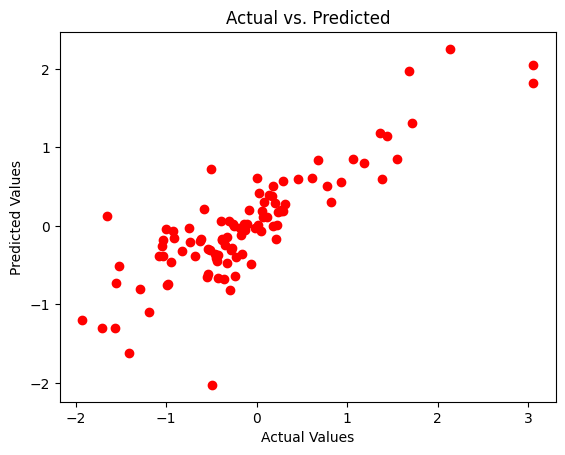

In [55]:
plt.scatter(Y_test, y_pred, color="red",)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()